In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:

# Load the datasets
# transactions_path = 'C:/Users/Samarth/Downloads/Transactions.csv'
# products_path = 'C:/Users/Samarth/Downloads/Products.csv'
# customers_path = 'C:/Users/Samarth/Downloads/Customers.csv'

# Reading the CSV files into pandas DataFrames
transactions = pd.read_csv('transactions.csv')
products = pd.read_csv('products.csv')
customers = pd.read_csv('Customers.csv')

In [3]:
# Displaying the first few rows of each dataset
transactions_head = transactions.head()
products_head = products.head()
customers_head = customers.head()


In [4]:
# Displaying basic info about each dataset
transactions_info = transactions.info()
products_info = products.info()
customers_info = customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pan

In [5]:
transactions_head

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [6]:
products_head

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [7]:
customers_head

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [8]:
# Converting date columns to datetime format
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

In [9]:
# Checking for missing values in all datasets
missing_transactions = transactions.isnull().sum()
missing_products = products.isnull().sum()
missing_customers = customers.isnull().sum()

In [10]:
# Checking for duplicate rows
duplicates_transactions = transactions.duplicated().sum()
duplicates_products = products.duplicated().sum()
duplicates_customers = customers.duplicated().sum()


In [11]:
# Summarizing total sales and quantity per product
product_sales = transactions.groupby('ProductID').agg(
    TotalSales=('TotalValue', 'sum'),
    TotalQuantity=('Quantity', 'sum')
).reset_index()

In [12]:
# Summarizing total sales per region
region_sales = transactions.merge(customers, on='CustomerID').groupby('Region').agg(
    TotalSales=('TotalValue', 'sum')
).reset_index()

In [13]:
missing_transactions


TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [14]:
missing_products

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [15]:
missing_customers

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [16]:
duplicates_transactions

0

In [17]:
duplicates_products

0

In [18]:
duplicates_customers

0

In [19]:
product_sales.head()

,ProductID,TotalSales,TotalQuantity
0,P001,3047.40,18
1,P002,8657.50,25
2,P003,1367.72,31
3,P004,1722.42,18
4,P005,10303.44,24


In [20]:
 product_sales.head()

,ProductID,TotalSales,TotalQuantity
0,P001,3047.40,18
1,P002,8657.50,25
2,P003,1367.72,31
3,P004,1722.42,18
4,P005,10303.44,24


In [21]:
region_sales.head()

,Region,TotalSales
0,Asia,152074.97
1,Europe,166254.63
2,North America,152313.40
3,South America,219352.56


In [22]:

# Top 10 products by total sales
top_products = product_sales.sort_values(by='TotalSales', ascending=False).head(10)
top_products = top_products.merge(products, on='ProductID', how='left')


In [23]:
# Regional sales distribution
region_sales_sorted = region_sales.sort_values(by='TotalSales', ascending=False)

In [24]:
# Monthly sales trends
transactions['MonthYear'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('MonthYear').agg(
    TotalSales=('TotalValue', 'sum')
).reset_index()
monthly_sales['MonthYear'] = monthly_sales['MonthYear'].astype(str)

In [25]:
# Sales by category
category_sales = transactions.merge(products, on='ProductID').groupby('Category').agg(
    TotalSales=('TotalValue', 'sum'),
    TotalQuantity=('Quantity', 'sum')
).reset_index()
category_sales_sorted = category_sales.sort_values(by='TotalSales', ascending=False)

In [26]:
# Plotting
sns.set_theme(style="whitegrid")

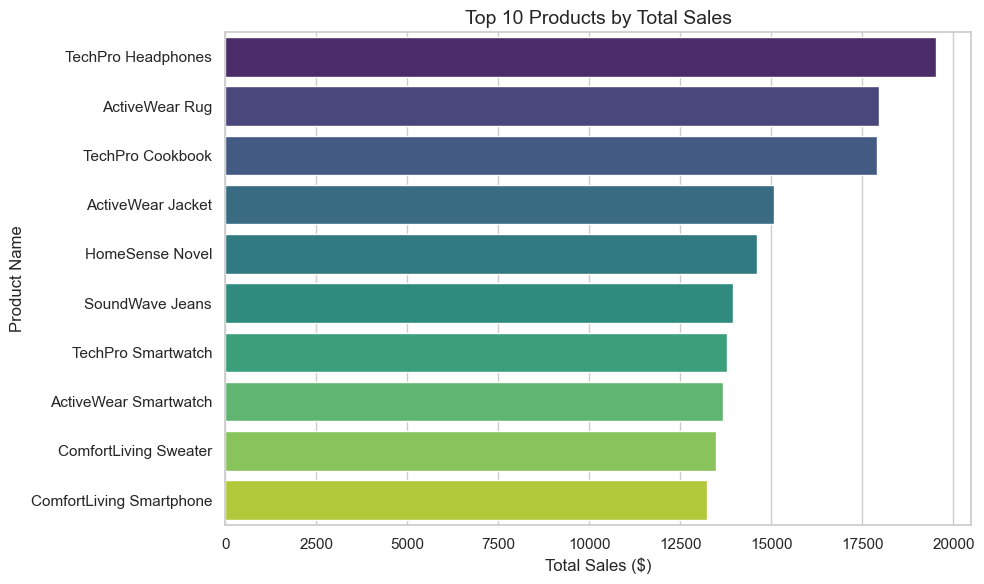

In [27]:
# Top 10 Products by Sales
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, y='ProductName', x='TotalSales', palette='viridis')
plt.title('Top 10 Products by Total Sales', fontsize=14)
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.tight_layout()
plt.show()

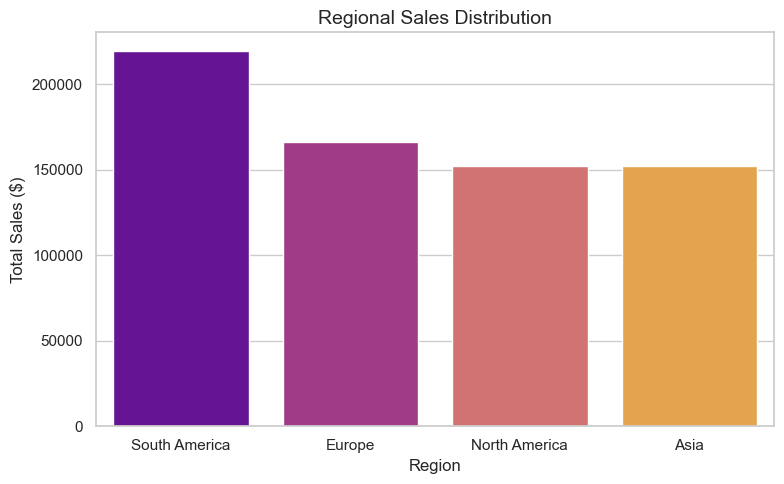

In [28]:
# Regional Sales Distribution
plt.figure(figsize=(8, 5))
sns.barplot(data=region_sales_sorted, x='Region', y='TotalSales', palette='plasma')
plt.title('Regional Sales Distribution', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.tight_layout()
plt.show()

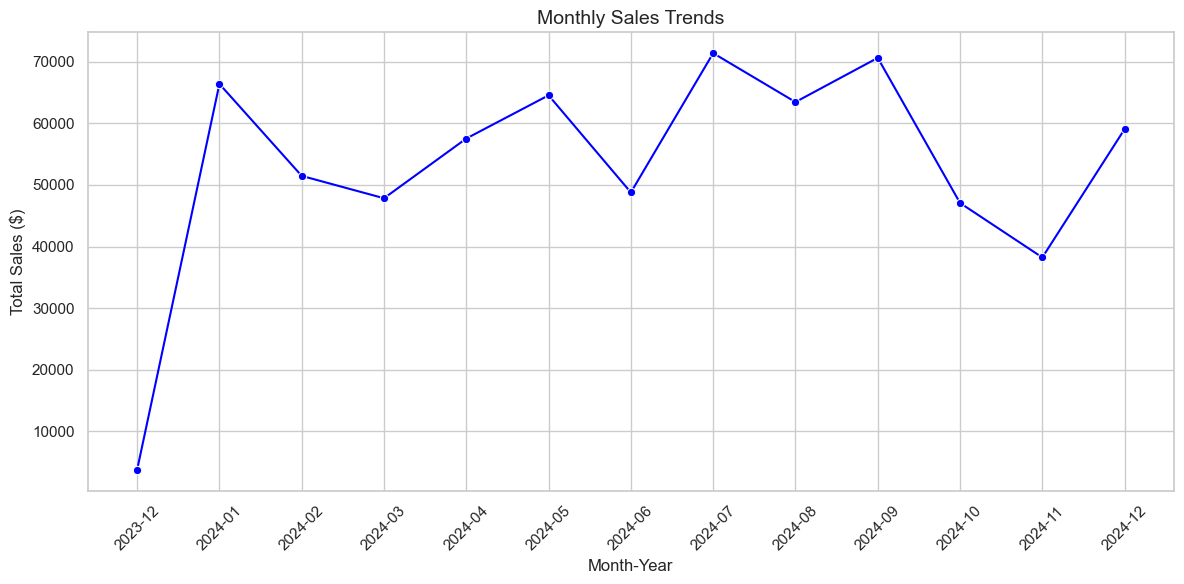

In [29]:
# Monthly Sales Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='MonthYear', y='TotalSales', marker='o', color='blue')
plt.title('Monthly Sales Trends', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


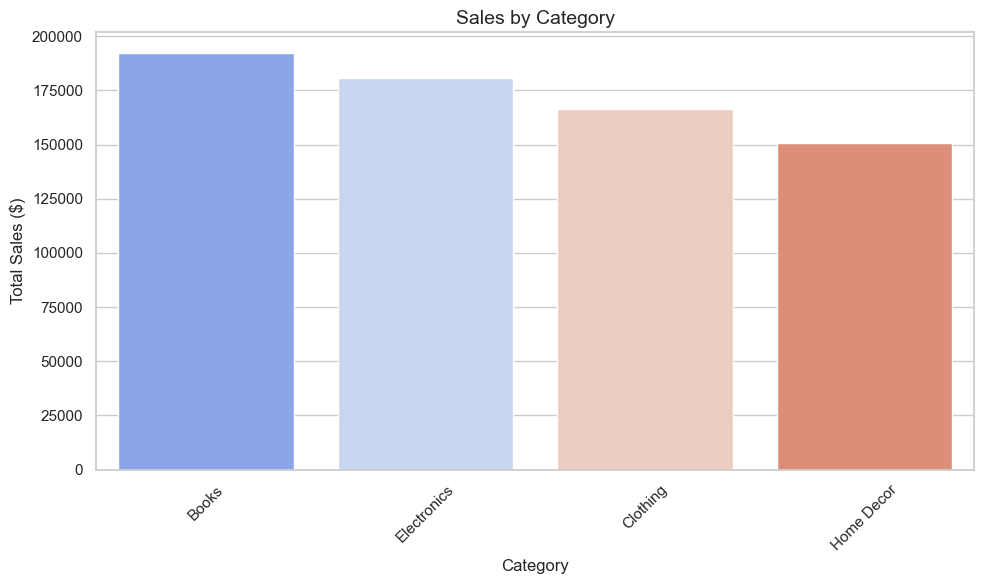

In [30]:
# Sales by Category
plt.figure(figsize=(10, 6))
sns.barplot(data=category_sales_sorted, x='Category', y='TotalSales', palette='coolwarm')
plt.title('Sales by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
# Calculate the average quantity sold per product
average_quantity = product_sales['TotalQuantity'].mean()

In [32]:
# Categorizing products
most_sold = product_sales.sort_values(by='TotalQuantity', ascending=False).head(5)
least_sold = product_sales.sort_values(by='TotalQuantity').head(5)
average_selling = product_sales[
    (product_sales['TotalQuantity'] >= average_quantity * 0.9) & 
    (product_sales['TotalQuantity'] <= average_quantity * 1.1)
].merge(products, on='ProductID', how='left')

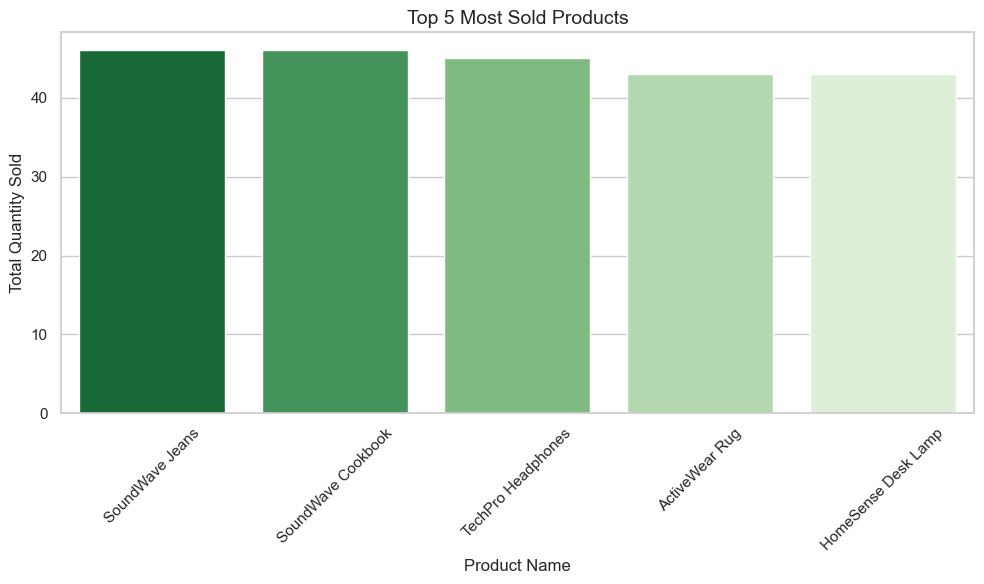

In [33]:
# Plotting the results

# Most Sold Products
plt.figure(figsize=(10, 6))
sns.barplot(data=most_sold.merge(products, on='ProductID', how='left'), 
            x='ProductName', y='TotalQuantity', palette='Greens_r')
plt.title('Top 5 Most Sold Products', fontsize=14)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

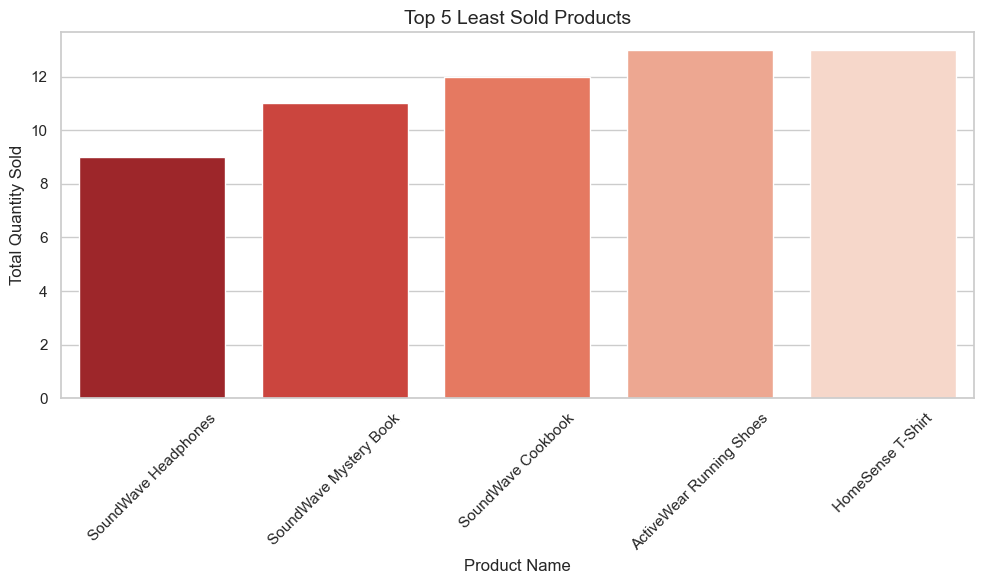

In [34]:
# Least Sold Products
plt.figure(figsize=(10, 6))
sns.barplot(data=least_sold.merge(products, on='ProductID', how='left'), 
            x='ProductName', y='TotalQuantity', palette='Reds_r')
plt.title('Top 5 Least Sold Products', fontsize=14)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

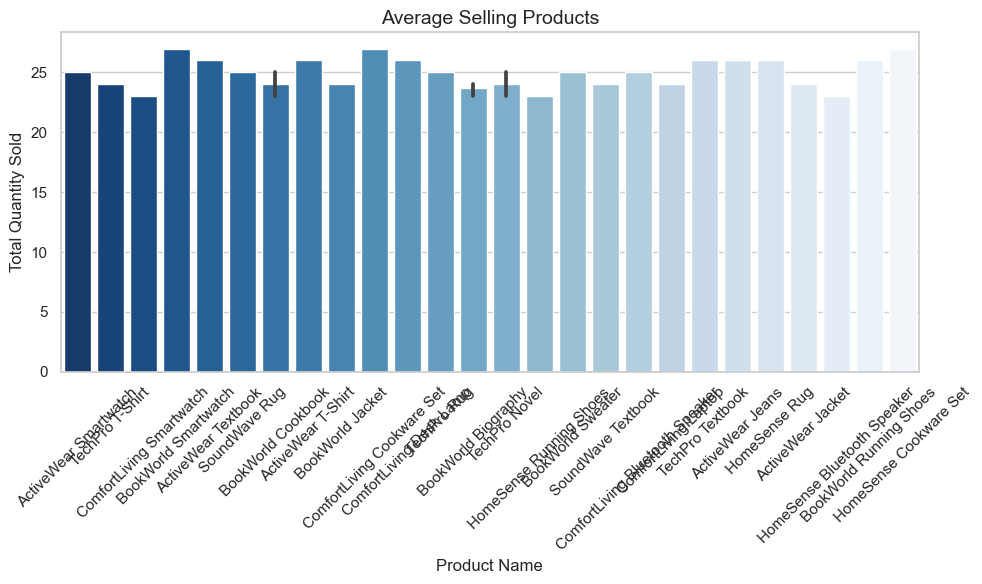

In [35]:
# Average Selling Products
plt.figure(figsize=(10, 6))
sns.barplot(data=average_selling, 
            x='ProductName', y='TotalQuantity', palette='Blues_r')
plt.title('Average Selling Products', fontsize=14)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
# Ensure TransactionDate is in datetime format
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [37]:
# Merge transactions and products datasets
merged_data = transactions.merge(products, on='ProductID')

In [38]:
# Extract Month-Year for grouping
merged_data['MonthYear'] = merged_data['TransactionDate'].dt.to_period('M')

In [39]:
# Group by category and month-year to calculate total sales
category_monthly_sales = merged_data.groupby(['Category', 'MonthYear']).agg(
    TotalSales=('TotalValue', 'sum')
).reset_index()

In [40]:
# Pivot the data for visualization
category_pivot = category_monthly_sales.pivot(index='MonthYear', columns='Category', values='TotalSales')

<Figure size 1200x800 with 0 Axes>

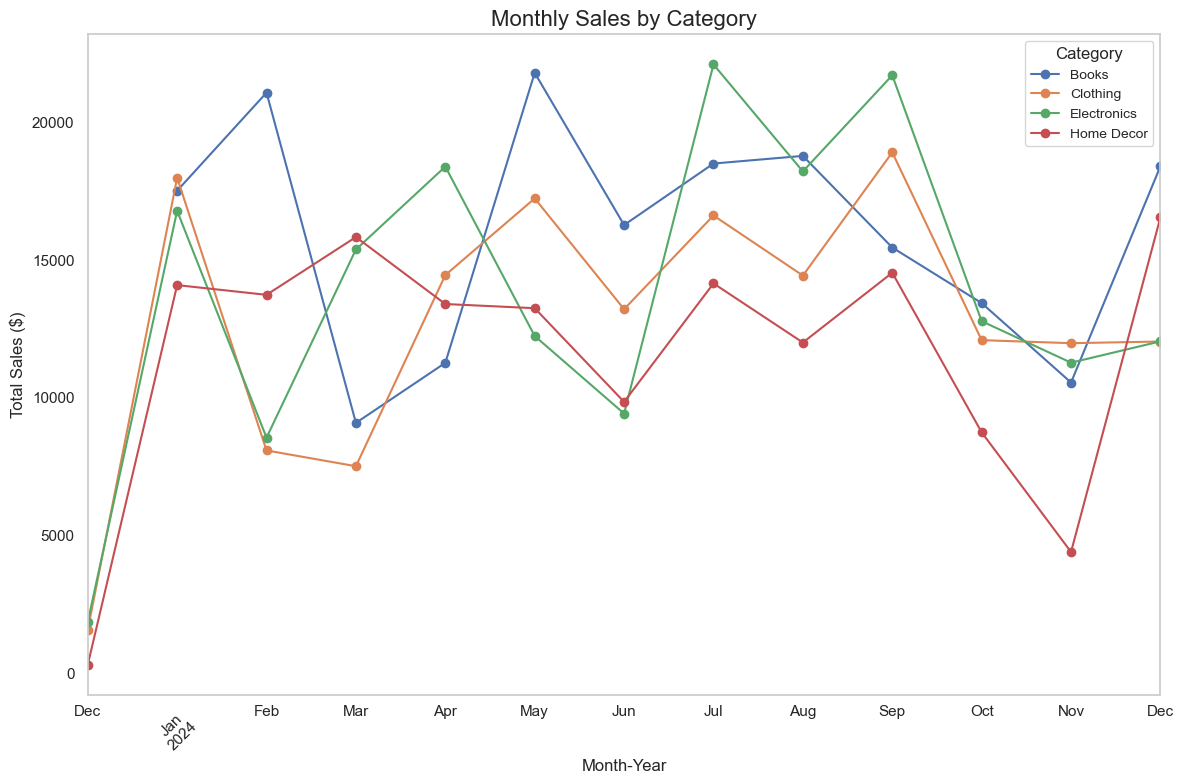

In [41]:
# Plotting
plt.figure(figsize=(12, 8))
category_pivot.plot(kind='line', figsize=(12, 8), marker='o')
plt.title('Monthly Sales by Category', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.legend(title='Category', fontsize=10)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [42]:
# Merge transactions and products datasets
merged_data = transactions.merge(products, on='ProductID')


In [43]:
# Calculate total revenue for each product
product_revenue = merged_data.groupby(['ProductID', 'ProductName']).agg(
    TotalRevenue=('TotalValue', 'sum')
).reset_index()

In [44]:
# Sort by revenue in descending order
top_revenue_product = product_revenue.sort_values(by='TotalRevenue', ascending=False).head(1)
top_products = product_revenue.sort_values(by='TotalRevenue', ascending=False).head(10)

In [45]:
# Print the product with maximum revenue
print("Product with Maximum Revenue:")
print(top_revenue_product)

Product with Maximum Revenue:
   ProductID         ProductName  TotalRevenue
28      P029  TechPro Headphones       19513.8


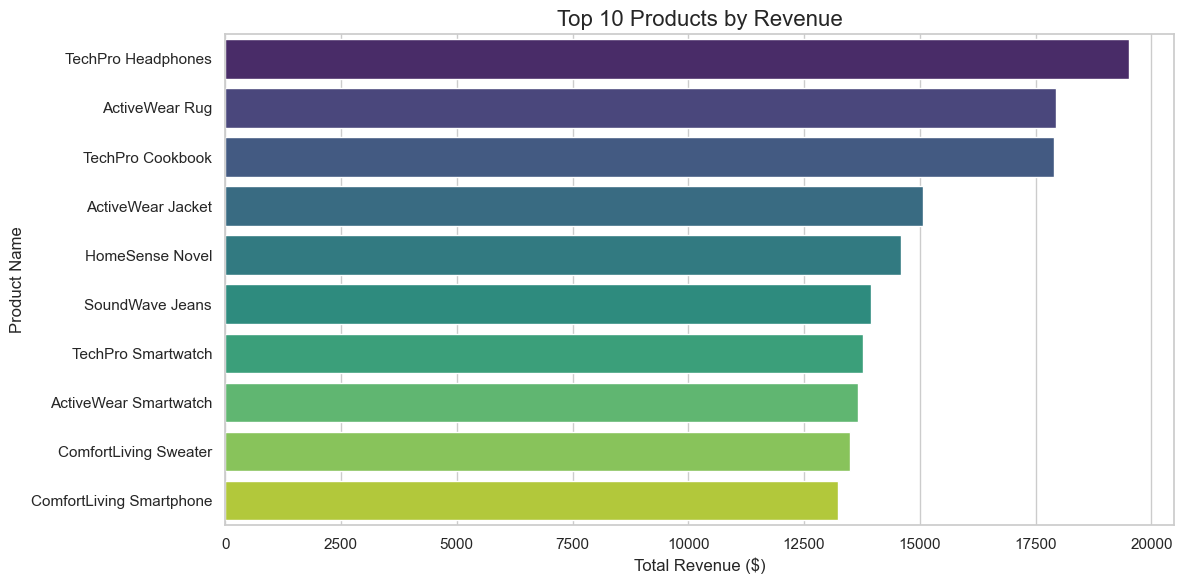

In [46]:
# Visualization: Top 10 Revenue-Generating Products
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, y='ProductName', x='TotalRevenue', palette='viridis')
plt.title('Top 10 Products by Revenue', fontsize=16)
plt.xlabel('Total Revenue ($)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.tight_layout()
plt.show()